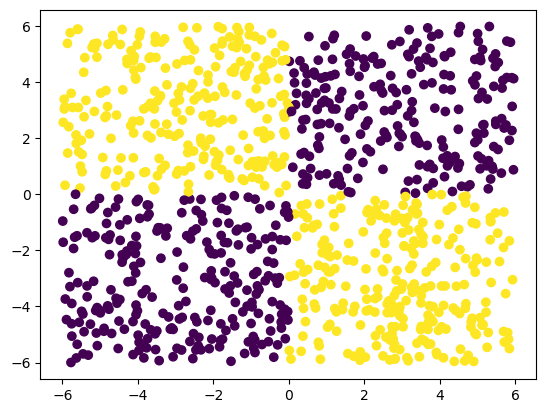

In [2]:

import numpy as np
import matplotlib.pyplot as plt

# number of samples
n = 1000

# create a dataset with random values between -6 and 6
x1 = np.random.uniform(-6, 6, n)
x2 = np.random.uniform(-6, 6, n)
y = np.zeros(n)

# if there is one value greater than 0, then the output is 1
# if there are two values greater than 0, then the output is 0
# if there are no values greater than 0, then the output is 0
for i in range(n):
    if x1[i] > 0 and x2[i] > 0:
        y[i] = 0
    elif x1[i] > 0 or x2[i] > 0:
        y[i] = 1
    else:
        y[i] = 0

# plot the dataset
plt.scatter(x1, x2, c=y)
plt.show()


In [3]:
import tensorboard

In [14]:
# create a 2-layer neural network with tensorflow
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import plot_model
from sklearn.model_selection import train_test_split
import datetime

# split data
x = np.column_stack((x1, x2))
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.2)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5)

# create the model
model = Sequential([
    Dense(4, input_dim=2, activation='relu'),
    Dense(1, activation='sigmoid')
])

# compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.1), 
              loss='binary_crossentropy', metrics=['accuracy'])

# tensorboard
logs = 'logs/fit/' + datetime.datetime.now().strftime('%Y%m%d-%H%M%S')
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logs, histogram_freq=1)

# add early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# train the model
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=100, callbacks=[tensorboard_callback, early_stopping])

# evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}')

# plot the loss and accuracy
# plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])


Epoch 1/100
25/25 [==============================] - 1s 13ms/step - loss: 0.5119 - accuracy: 0.7387 - val_loss: 0.2850 - val_accuracy: 0.8800
Epoch 2/100
25/25 [==============================] - 0s 7ms/step - loss: 0.2279 - accuracy: 0.9237 - val_loss: 0.1570 - val_accuracy: 0.9600
Epoch 3/100
25/25 [==============================] - 0s 8ms/step - loss: 0.1494 - accuracy: 0.9438 - val_loss: 0.1140 - val_accuracy: 0.9700
Epoch 4/100
25/25 [==============================] - 0s 7ms/step - loss: 0.1079 - accuracy: 0.9600 - val_loss: 0.1064 - val_accuracy: 0.9400
Epoch 5/100
25/25 [==============================] - 0s 6ms/step - loss: 0.0691 - accuracy: 0.9725 - val_loss: 0.0577 - val_accuracy: 0.9700
Epoch 6/100
25/25 [==============================] - 0s 4ms/step - loss: 0.0533 - accuracy: 0.9825 - val_loss: 0.0463 - val_accuracy: 1.0000
Epoch 7/100
25/25 [==============================] - 0s 4ms/step - loss: 0.0741 - accuracy: 0.9750 - val_loss: 0.0567 - val_accuracy: 0.9700
Epoch 8/100


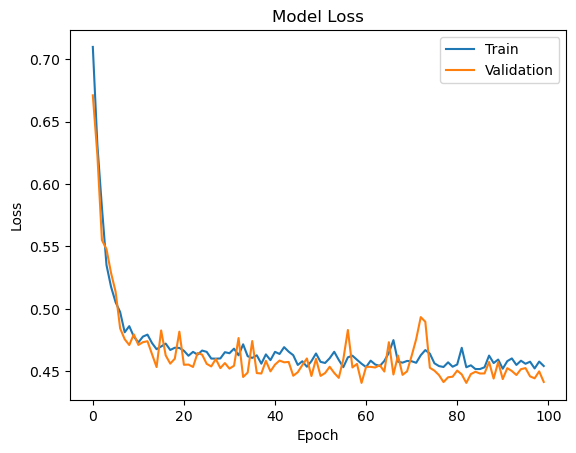

In [6]:
# plot the loss and accuracy
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [10]:
# Extract the weights and bias
bias = weights[1]
w1 = weights[0][0]
w2 = weights[0][1]

# print weights and bias
print(f'w1: {w1}, w2: {w2}, bias: {bias}')

[array([[-2.399406 , -1.5542622],
       [-3.430321 ,  2.397744 ]], dtype=float32), array([ 12.924691, -10.068346], dtype=float32), array([[7.1222863],
       [9.85157  ]], dtype=float32), array([-6.936331], dtype=float32)]
w1: [-2.399406  -1.5542622], w2: [-3.430321  2.397744], bias: [ 12.924691 -10.068346]
